In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [5]:
from keras import Model

In [7]:
from keras.applications.densenet import DenseNet121
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D

In [9]:
path = 'C:\\Users\\off1c\\OneDrive\\Desktop\\Datsets\\Fashion\\'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path)
dirs_names

['images', 'myntradataset', 'styles.csv']

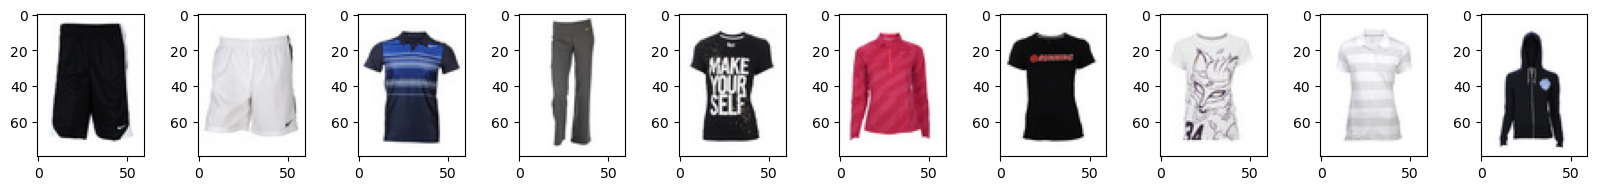

In [11]:
plt.figure(figsize=(20,20))
for i in range(20, 30):
    plt.subplot(6, 10, i - 19)
    cloth_img = mpimg.imread(path + 'images/100' + str(i) + '.jpg')
    plt.imshow(cloth_img)
    # plt.axis('off')
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# DataFrame

In [13]:
styles_df = pd.read_csv(path+"styles.csv", nrows=6000, on_bad_lines='skip')
styles_df['image'] = styles_df.apply(lambda x: str(x['id'])+".jpg", axis=1)
print(styles_df.shape)
styles_df.head(5)

(6000, 11)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


<Axes: ylabel='articleType'>

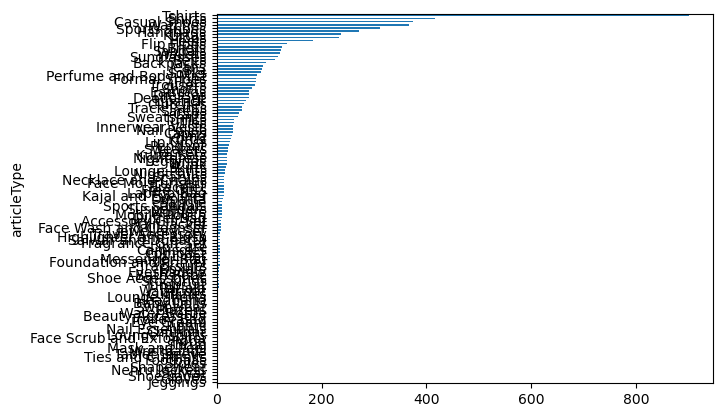

In [15]:
plt.figure(figure=(20,100))
styles_df.articleType.value_counts().sort_values().plot(kind='barh')
# We have more than 1000 items collections so our data plots is showing very nasty  

# Modeling And Get Image Enbeddings

In [17]:
img_width, img_height, chnls = 100, 100, 3

In [19]:
from tensorflow.keras.applications import VGG16

In [21]:
vgg16 = VGG16(include_top=False, weights = 'imagenet', input_shape=(img_width, img_height, chnls))
vgg16.trainable=False
vgg16_model = keras.Sequential([vgg16, GlobalMaxPooling2D()])
vgg16_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
def img_path(img):
    return path+'images/'+img

def predict(model, img_name):
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return model.predict(img)

In [25]:
def get_embeddings(df,model):
    df_copy = df
    df_embeddings = df_copy['image'].apply(lambda x: predict(vgg16_model, x).reshape(-1))
    df_embeddings = df_embeddings.apply(pd.Series)
    return df_embeddings

In [ ]:
df_embeddings = get_embeddings(styles_df,vgg16_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

In [29]:
df_embeddings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.000000,0.0,0.000000,0.000000,0.423064,0.000000,0.000000,0.0,0.0,0.0,...,0.442218,2.486114,0.000000,0.000000,0.003336,0.250698,0.000000,0.000000,0.679871,2.707931
1,0.656388,0.0,0.226174,0.000000,0.734097,0.000000,1.910262,0.0,0.0,0.0,...,1.004094,3.999026,0.000000,0.623049,0.519440,0.552859,1.366483,0.992331,0.629039,1.477583
2,0.113615,0.0,0.000000,1.226548,0.866502,0.000000,0.938749,0.0,0.0,0.0,...,1.014140,0.170607,0.000000,0.115413,0.141612,0.493683,0.078028,0.000000,1.143076,0.000000
3,0.000000,0.0,0.000000,0.000000,0.614342,0.000000,0.848840,0.0,0.0,0.0,...,1.126509,2.467212,0.124418,0.000000,0.000000,0.192454,0.507868,0.000000,0.111597,2.579832
4,0.000000,0.0,0.000000,0.000000,0.096241,0.220482,0.000000,0.0,0.0,0.0,...,0.163552,0.334456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044779,2.458955


# Ensure your picture quality is better 

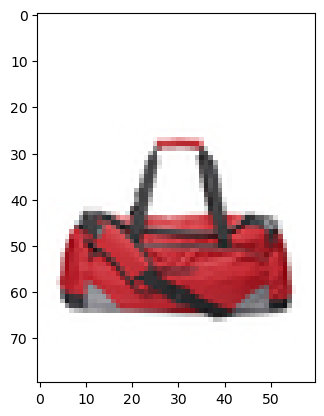

In [173]:
url = r"C:\Users\off1c\OneDrive\Desktop\Datsets\Fashion\images\22647.jpg" #Enter the path url of sample image
a = mpimg.imread(url) #Ensure that your all sample images and recommended images are in same forlder
plt.imshow(a) 
# plt.axis('off') 
plt.show()

In [175]:
sample_image = predict(vgg16_model,'22647.jpg') #change image format and file name
sample_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


(1, 512)

In [177]:
df_sample_image = pd.DataFrame(sample_image)
print(df_sample_image)

   0    1    2    3          4         5    6    7    8         9    ...  \
0  0.0  0.0  0.0  0.0  10.701138  4.985878  0.0  0.0  0.0  38.20208  ...   

         502  503       504  505  506  507        508  509  510  511  
0  15.489122  0.0  7.045277  0.0  0.0  0.0  10.274238  0.0  0.0  0.0  

[1 rows x 512 columns]


In [179]:
from sklearn.metrics.pairwise import linear_kernel

In [181]:
sample_similarity = linear_kernel(df_sample_image, df_embeddings)
print(sample_similarity)

[[2438.4685 3835.188  2073.121  ... 3153.5474 3225.1436 3052.9978]]


In [183]:
def get_similarity(model):
    sample_image = predict(vgg16_model,'22647.jpg') #Change Image format and file name here too
    df_sample_image = pd.DataFrame(sample_image)
    sample_similrity = linear_kernel(df_sample_image, df_embeddings)
    return sample_similarity

In [185]:
def normalize_sim(similarity):
    x_min = similarity.min(axis=1)
    x_max = similarity.max(axis=1)
    norm = (similarity-x_min)/(x_max-x_min)[:, np.newaxis]
    return norm

sample_similarity_norm = normalize_sim(sample_similarity)

In [187]:
sample_similarity_norm.shape

(1, 6000)

In [189]:
def get_recommendation(df, similarity):
    sim_scores = list(enumerate(similarity[0]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:5]
    print(sim_scores)
    
    cloth_indices = [i[0] for i in sim_scores]
    return df['image'].iloc[cloth_indices]

In [191]:
recommendation = get_recommendation(styles_df, sample_similarity_norm)

[(2438, 1.0), (5239, 0.99612427), (1518, 0.9727714), (4317, 0.9721747), (2266, 0.9700973)]


In [193]:
recommendation_list = recommendation.to_list()

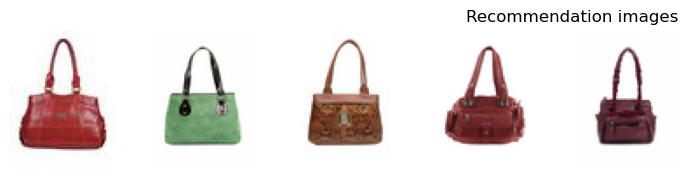

In [195]:
plt.figure(figsize=(20,20))
j=0

for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img = mpimg.imread(path+'images/'+i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1

plt.title("Recommendation images",loc='right')
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [67]:
# import gradio as gr
# import os
# import shutil
# import numpy as np
# import pandas as pd
# import matplotlib.image as mpimg
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from sklearn.metrics.pairwise import linear_kernel

# # Assuming necessary functions like predict, normalize_sim, get_recommendation, etc., are already defined.

# def recommend_and_display(uploaded_img):
#     # Save uploaded image to the designated folder
#     img_name = "uploaded_image.jpg"
#     uploaded_img_full_path = path + 'images/' + img_name
#     uploaded_img.save(uploaded_img_full_path)
    
#     # Predict and compute similarity
#     sample_image = predict(vgg16_model, img_name)
#     sample_similarity = linear_kernel(sample_image, df_embeddings)
#     sample_similarity_norm = normalize_sim(sample_similarity)
    
#     # Get recommendations
#     recommendation = get_recommendation(styles_df, sample_similarity_norm, top_n=5)
#     recommendation_list = recommendation.to_list()
    
#     # Load recommended images
#     rec_images = [mpimg.imread(path + 'images/' + img) for img in recommendation_list]
    
#     # Return recommended images as output
#     return rec_images

# # Gradio interface
# interface = gr.Interface(
#     fn=recommend_and_display,
#     inputs=gr.Image(label="Upload an Image", type="pil"),  # PIL format image input
#     outputs=gr.Gallery(label="Recommended Images"),  # Corrected this part to use Gallery for multiple images
#     title="Fashion Recommendation System",
#     description="Upload an image to get clothing recommendations in image format."
# )

# # Launch the app
# interface.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
